# Import

In [2]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


# Traitement Image pour faire du gradiant

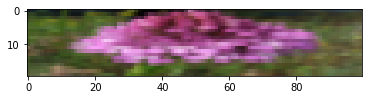

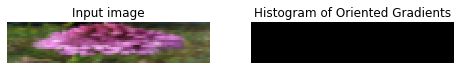

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure

import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


#Récupération de l'image
image = mpimg.imread(os.getcwd()+"/small_dataset_train/train/281.jpg")

#Transformaation de l'image dans un format utilisable
if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
    image = (image * 255).astype(np.uint8)
    
image = resize(image, (20,100),
                       anti_aliasing=True)

#Affichage Image
plt.imshow(image)
#plt.show()

#Début traitement pour avoir les gradiant
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()




Définition de la fonction donnant l histogramme des gradiants

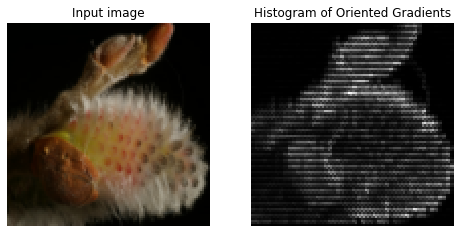

In [35]:

# import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure
from PIL import Image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def pretraitement(image):
    #Reduction de l'image 
    image=resize(image,(200,200));
    #Transformaation de l'image dans un format utilisable
    if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
        image = (image * 255).astype(np.uint8)
    #Image en noir et blanc
    image=rgb2gray(image);
    return image;

def transformeGradiant(nomImage):
    #Récupération de l'image
    image = mpimg.imread(os.getcwd()+"/small_dataset_train/train/"+nomImage)
    
    #Prétraitement des images
    image=pretraitement(image);
    
    #Début traitement pour avoir les gradiant
    fd = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(5, 5),feature_vector=True)
    return fd;

def transformeGradiantEnImage(nomImage):
    #Récupération de l'image
    image = mpimg.imread(os.getcwd()+"/small_dataset_train/train/"+nomImage)
    imge=resize(image,(100,100));
    #Transformaation de l'image dans un format utilisable
    if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
        image = (image * 255).astype(np.uint8)
    #Début traitement pour avoir les gradiant
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(5, 5), visualize=True)


    hog_image = resize(hog_image, (100,100),
                       anti_aliasing=True)
    return hog_image;

def afficherFleurEtGradiant(nomImage,hog_image):
    image = mpimg.imread(os.getcwd()+"/Descente_Gradiant/trainResize/"+nomImage)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show();

imgTest=transformeGradiant("23.jpg")
imgTest=transformeGradiantEnImage("23.jpg")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

im=resize(mpimg.imread(os.getcwd()+"/small_dataset_train/train/23.jpg"),(100,100))

ax1.axis('off')
ax1.imshow(im, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
#hog_image_rescaled = exposure.rescale_intensity(imgTest, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(imgTest, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# Création listes pour le classifieur 

In [28]:
def creationDicoSpecies():
    chemin = os.getcwd()+"/small_dataset_train/train/";
    dico={}
    files = os.listdir(chemin);
    i=0;
    for file in files:
        if file.endswith('.json') and i<3000:
            openFile = open(chemin+file, "r");
            fileSansExt=file.split(".");
            espece=json.loads(openFile.read())["Image"]["Species"];
            openFile.close();
            dico[fileSansExt[0]]=espece;
            i=i+1;
    return dico;

In [36]:

#Création d'un dico clé:fichier JSON valeur: Nom espece
dicoSpe=creationDicoSpecies();
#display(dicoSpe);
#Création liste

#Creation des listes de train pour le classifieur
ListGrad=[];
ListEspece=[];

i=0;
for clé in dicoSpe:
    fd=transformeGradiant(clé+".jpg");
    #if i<10:
    #    print(clé+".jpg",fd);
    #    i=i+1;
    #print(i , " : " , clé);
    ListGrad.append(fd);
    ListEspece.append(dicoSpe[clé])
    

#afficherFleurEtGradiant("23.jpg",df['Gradiant'].get(1));
print("c est bon ca marche")

KeyboardInterrupt: 

# Début Classifieurs

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#array[:,0:len(df.columns)-1] 
X =np.asarray(ListGrad);
y = np.asarray(ListEspece);
validation_size=0.66 #33% du jeu de données pour le test

testsize= 1-validation_size
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                                test_size=0.33)

#Test classifieur GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)

result = clf.predict(X_test)
#print (result)

print ('accuracy: ',accuracy_score(result, y_test))

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)

print ('\n',classification_report(y_test, result))



accuracy:  0.18686868686868688

 matrice de confusion 
 [[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  1 12  0]
 [ 0  0  0 ...  1  0  3]]

                                                          precision    recall  f1-score   support

                                Achillea millefolium L.       0.04      0.10      0.06        10
                                   Aconitum napellus L.       0.00      0.00      0.00        21
Anacamptis morio (L.) R.M.Bateman, Pridgeon & M.W.Chase       0.00      0.00      0.00        15
                      Anacamptis pyramidalis (L.) Rich.       0.00      0.00      0.00        22
                                      Anemone alpina L.       0.12      0.06      0.08        16
                                    Anemone hepatica L.       0.17      0.06      0.08        18
                                    Anemone nemorosa L.       0.50      0.07      0.12        15
         

/home/thomas/Bureau/Reconnaissance-visuel-de-plante/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#array[:,0:len(df.columns)-1] 
X =np.asarray(ListGrad);
y = np.asarray(ListEspece);
validation_size=0.66 #33% du jeu de données pour le test

testsize= 1-validation_size
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                                test_size=0.33)

#Test classifieur GaussianNB
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

result = clf.predict(X_test)
print (result)

print ('accuracy: ',accuracy_score(result, y_test))

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)

print ('\n',classification_report(y_test, result))



['Centaurea jacea L.' 'Anemone alpina L.' 'Daucus carota L.'
 'Urospermum dalechampii (L.) Scop. ex F.W.Schmidt' 'Cichorium intybus L.'
 'Himantoglossum hircinum (L.) Spreng.' 'Cirsium vulgare (Savi) Ten.'
 'Bellis perennis L.' 'Cypripedium calceolus L.' 'Achillea millefolium L.'
 'Himantoglossum hircinum (L.) Spreng.' 'Dactylorhiza maculata (L.) Soó'
 'Anacamptis morio (L.) R.M.Bateman, Pridgeon & M.W.Chase'
 'Bellis perennis L.' 'Achillea millefolium L.' 'Daucus carota L.'
 'Cyanus segetum Hill' 'Cichorium intybus L.'
 'Epipactis atrorubens (Hoffm.) Besser' 'Clematis vitalba L.'
 'Cyanus segetum Hill' 'Cyanus segetum Hill' 'Cichorium intybus L.'
 'Achillea millefolium L.' 'Anacamptis pyramidalis (L.) Rich.'
 'Aconitum napellus L.' 'Orchis purpurea Huds.' 'Achillea millefolium L.'
 'Astrantia major L.' 'Anacamptis pyramidalis (L.) Rich.'
 'Anacamptis pyramidalis (L.) Rich.' 'Anacamptis pyramidalis (L.) Rich.'
 'Bellis perennis L.' 'Achillea millefolium L.' 'Daucus carota L.'
 'Daucus 

/home/thomas/Bureau/Reconnaissance-visuel-de-plante/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
